<a href="https://colab.research.google.com/github/Abel-kaiki/Modelling/blob/main/Hybrid_model_for_project_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# data analysis
import pandas as pd
import numpy as np
# visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
# scaling and train test split
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
# creating a model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.optimizers import SGD
from sklearn.metrics import r2_score
import time

from google.colab import drive
drive.mount("/content/drive")

# Load dataset
path = '/content/drive/MyDrive/ColabNotebooks/Datasets/ANN model test3.csv' #Adjust file path based on use case.

# Start timer
start_time = time.time()

#read data
df=pd.read_csv(path)

# Predict dataset
df2=df.tail(5)
x_pred = df2[['Temperature', 'pH','RPM','Time']]
y_pred = df2[['Cell']]
# Features
df1=df.head(25)
X = df1[['Temperature', 'pH','RPM','Time']]
# Label
y = df1[['Cell']]
## Split
X_train, X_test, y_train, y_test= train_test_split(X,y, test_size=0.2, random_state=101)
X_train_raw=X_train
scaler = MinMaxScaler()
# fit and transfrom
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

#Building the model
model1 = Sequential()
# input layer
model1.add(Dense(4,activation='sigmoid',use_bias= True, bias_initializer='zeros'))
# hidden layers
model1.add(Dense(9,activation='sigmoid',use_bias= True, bias_initializer='zeros'))
# output layer
model1.add(Dense(1))
model1.compile(optimizer='SGD', loss='mse')

model1.fit(x=X_train,y=y_train.values,validation_data=(X_test,y_test.values),batch_size=5,epochs=1000,verbose=0)
y_pred= model1.predict(x= X_test,verbose=0)
accuracy = r2_score(y_test, y_pred)

print("Accuracy:", accuracy)

# End and print run time
end_time = time.time()
run_time = end_time - start_time
print(f"Run time: {run_time:.3f} seconds")

Mounted at /content/drive
Accuracy: 0.9831618149181462
Run time: 44.041 seconds


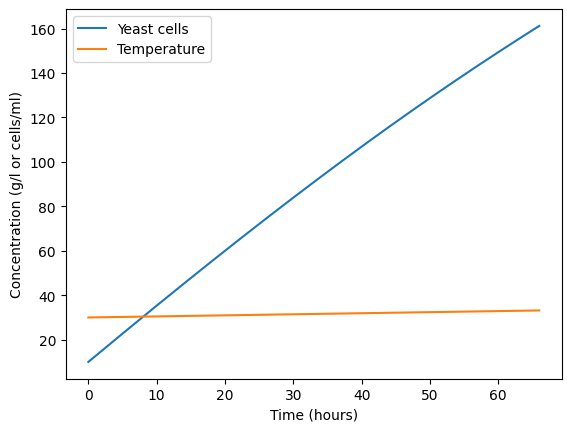

Run time: 9.793 seconds


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint
import time

# Start timer
start_time = time.time()

# Simulation parameters
t0 = 0        # initial time (hours)
dt = 0.1      # time step (hours)
V = 3       # volume of fermentation vessel (liters)
Cell0 = 10   # initial yeast cell concentration (cells/l)
deltaH = 0    # heat release per g of cell growth (kJ/g)

#enviroment
T0 = 30 #Temperature
pH=7 #pH
RPM=120 #Stirrer speed
tf = 66 # final time (hours)

# Define differential equations
def ferm_eqns(y, t):
    Cell,T = y
    input=np.array([T,pH,RPM,tf]).reshape(1,4)
    input = pd.DataFrame(input, columns=['Temperature', 'pH', 'RPM','Time'])

    scaler.fit(X_train_raw)

    scaled_input = scaler.transform(input)
    if T <= 37 and T>=20:
      if pH <= 10 and pH >= 5:
        dCell_dt = model1.predict(scaled_input,verbose=0)[0][0]/10
        dT_dt=(dCell_dt*deltaH+RPM*0.005)/4.184/3;
      else:
        dCell_dt=-0.005116*Cell
        dT_dt= RPM*0.005/4.184/3
        #dT_dt= 0
    else:
        dCell_dt=-0.05*Cell
        dT_dt = RPM*0.005/4.184/3
        #dT_dt= 0

    return [dCell_dt,dT_dt]
# Initial conditions
y0 = [ Cell0, T0]

# Solve differential equations
t = np.arange(t0, tf+dt, dt)
sol = odeint(ferm_eqns, y0, t)

# Extract solution components
Cell = sol[:, 0]
T=sol[:,1]
# Plot results
plt.plot(t, Cell, label='Yeast cells')
plt.plot(t, T, label='Temperature')
plt.xlabel('Time (hours)')
plt.ylabel('Concentration (g/l or cells/ml)')
plt.legend()
plt.show()

# End and print run time
end_time = time.time()
run_time = end_time - start_time
print(f"Run time: {run_time:.3f} seconds")

In [ ]:
print(max(Cell))

161.16040583124558
